In [153]:
import re
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Dense,Embedding
from keras.layers import LSTM,Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from sklearn.model_selection import train_test_split
import fasttext
import os

In [154]:
#Cleaning
data=pd.read_csv('offensiveMemes.csv')
data.text_corrected=data.text_corrected.astype(str)
data["text_corrected"]= data["text_corrected"].str.lower() 
print(data)

data=data.sample(frac=1).reset_index(drop=True)


print(data.shape)
data['text_corrected'] = data['text_corrected'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))


          image_name                                           text_ocr  \
0        image_1.jpg  LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...   
1       image_2.jpeg  The best of #10 YearChallenge! Completed in le...   
2        image_3.JPG  Sam Thorne @Strippin ( Follow Follow Saw every...   
3        image_4.png              10 Year Challenge - Sweet Dee Edition   
4        image_5.png  10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...   
...              ...                                                ...   
6987  image_6988.jpg  Tuesday is Mardi Gras Wednesday is Valentine's...   
6988  image_6989.jpg  MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...   
6989  image_6990.png  LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...   
6990  image_6991.jpg  When I VERY have time is a fantasy No one has ...   
6991  image_6992.jpg  The starting point for every good idea is "Wha...   

                                         text_corrected       offensive  
0     look there my frien

In [155]:
data_f=pd.DataFrame(data, columns = ['text_corrected', 'offensive'])

data_f = data_f.rename(columns={"text_corrected":"text", "offensive":"label"})


data_f['label'] = '__label__' + data_f['label'].astype(str)
data_f.to_csv('final.txt', sep='\t', index = False, header = False)


training_data_path=os.getcwd()+'/final.txt'
print(training_data_path)

/Users/askvyas/Documents/Memology/final.txt


In [156]:
a=data_f[data_f['label']=='__label__not_offensive']
b=data_f[data_f['label']=='__label__very_offensive']
c=data_f[data_f['label']=='__label__slight']
d=data_f[data_f['label']=='__label__hateful_offensive']


data_v=a.sample(200)
data_v=data_v.append(b.sample(200))
data_v=data_v.append(c.sample(200))
data_v=data_v.append(d.sample(200))
data_v.to_csv('valid.txt', sep='\t', index = False, header = False)
validation_data_path=os.getcwd()+'/valid.txt'
print(validation_data_path)


/Users/askvyas/Documents/Memology/valid.txt


In [157]:
hyper_params = {"lr": 0.01,
                        "epoch": 20,
                        "wordNgrams": 2,
                        "dim": 300}


model = fasttext.train_supervised(input=training_data_path, **hyper_params)



In [158]:
        result = model.test(training_data_path)
        validation = model.test(validation_data_path)
        
        # DISPLAY ACCURACY OF TRAINED MODEL
        text_line = str(hyper_params) + ",accuracy:" + str(result[1])  + ",validation:" + str(validation[1]) + '\n' 
        print(text_line)


{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 300},accuracy:0.3880148741418764,validation:0.25



In [159]:
model.quantize()

In [160]:
        validation = model.test(validation_data_path)
        
        # DISPLAY ACCURACY OF TRAINED MODEL
        text_line = str(hyper_params) + ",accuracy:" + str(result[1])  + ",validation:" + str(validation[1]) + '\n' 
        print(text_line)


{'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 300},accuracy:0.3880148741418764,validation:0.25



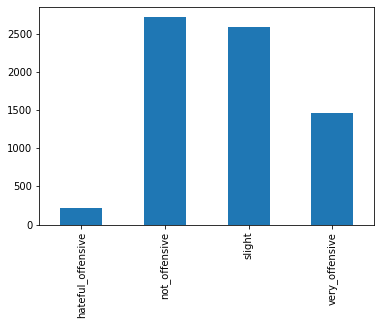

In [161]:
data['offensive'].value_counts().sort_index().plot.bar()

In [162]:
model.predict("shut up  german hillary  before i slap your canadian girlfriend")

(('__label__not_offensive',), array([0.29380018]))